In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<font color='yellow' size='5px'>
Copy datasets to colab

In [ ]:
%mkdir /content/data/
root_folder = '/content/drive/MyDrive/Uni/SNA/Final-Project/WikiLinksGraph/'
file_name_2001 = 'enwiki.wikilink_graph.2001-03-01.csv.gz'
file_name_2002 = 'enwiki.wikilink_graph.2002-03-01.csv.gz'
file_name_2003 = 'enwiki.wikilink_graph.2003-03-01.csv.gz'
file_name_2004 = 'enwiki.wikilink_graph.2004-03-01.csv.gz'
file_name_2005 = 'enwiki.wikilink_graph.2005-03-01.csv.gz'
file_name_2006 = 'enwiki.wikilink_graph.2006-03-01.csv.gz'



file_2001 = root_folder + file_name_2001
file_2002 = root_folder + file_name_2002
file_2003 = root_folder + file_name_2003
file_2004 = root_folder + file_name_2004
file_2005 = root_folder + file_name_2005
file_2006 = root_folder + file_name_2006


path_2001 = './data/' + file_name_2001
path_2002 = './data/' + file_name_2002
path_2003 = './data/' + file_name_2003
path_2004 = './data/' + file_name_2004
path_2005 = './data/' + file_name_2005
path_2006 = './data/' + file_name_2006


In [ ]:
%cp {file_2001} /content/data/
%cp {file_2002} /content/data/
%cp {file_2003} /content/data/
%cp {file_2004} /content/data/
%cp {file_2005} /content/data/
%cp {file_2006} /content/data/


<font color='yellow' size='5px'>
Define functions to create graph from file and reduce memory usage

In [ ]:
# ref: https://www.mikulskibartosz.name/how-to-reduce-memory-usage-in-pandas/
import gc
#from tqdm import tqdm
import numpy as np

def reduce_mem_usage(df, int_cast=True, obj_to_category=False, subset=None):
    """
    Iterate through all the columns of a dataframe and modify the data type to reduce memory usage.
    :param df: dataframe to reduce (pd.DataFrame)
    :param int_cast: indicate if columns should be tried to be casted to int (bool)
    :param obj_to_category: convert non-datetime related objects to category dtype (bool)
    :param subset: subset of columns to analyse (list)
    :return: dataset with the column dtypes adjusted (pd.DataFrame)
    """
    start_mem = df.memory_usage().sum() / 1024 ** 2;
    gc.collect()
    #print('\nMemory usage of dataframe is {:.2f} MB'.format(start_mem))

    cols = subset if subset is not None else df.columns.tolist()

    for col in cols:
        col_type = df[col].dtype

        if col_type != object and col_type.name != 'category' and 'datetime' not in col_type.name:
            c_min = df[col].min()
            c_max = df[col].max()

            # test if column can be converted to an integer
            treat_as_int = str(col_type)[:3] == 'int'
            if int_cast and not treat_as_int:
                treat_as_int = check_if_integer(df[col])

            if treat_as_int:
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.uint8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                    df[col] = df[col].astype(np.uint16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                    df[col] = df[col].astype(np.uint32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                    df[col] = df[col].astype(np.uint64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        elif 'datetime' not in col_type.name and obj_to_category:
            df[col] = df[col].astype('category')
    gc.collect()
    end_mem = df.memory_usage().sum() / 1024 ** 2
    #print('Memory usage after optimization is: {:.3f} MB'.format(end_mem))
    #print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df

In [ ]:
import pandas as pd
import networkx as nx
def create_wiki_graph(path):
  df = pd.read_csv(path, compression='gzip', delimiter='\t')
  df = reduce_mem_usage(df)
  g = nx.from_pandas_edgelist(df, source='page_id_from', target='page_id_to', create_using=nx.DiGraph())

  return g

<font color='yellow' size='5px'>
Plot degree distribution

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
def plot_degree_dist(path, title='Degree Distribution'):
  g = create_wiki_graph(path)
  degrees = [g.degree(n) for n in g.nodes()]
  counts = Counter(degrees)                                                                                                 
  x, y = zip(*counts.items())

  plt.figure(1)
  plt.title(title, color='red')
  plt.xlabel('Degree')
  plt.xscale('log')
  plt.xlim(1, max(x))

  plt.ylabel('Count')
  plt.yscale('log')
  plt.ylim(1, max(x))

  plt.scatter(x,y, marker='o')
  plt.show()

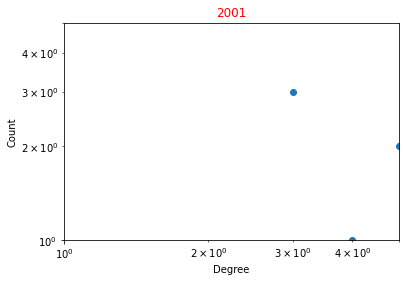

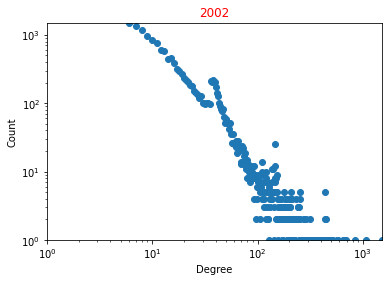

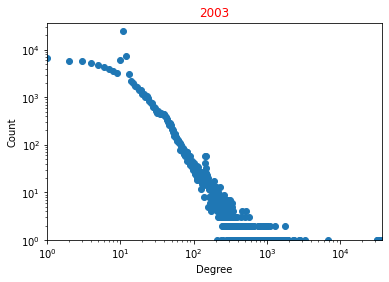

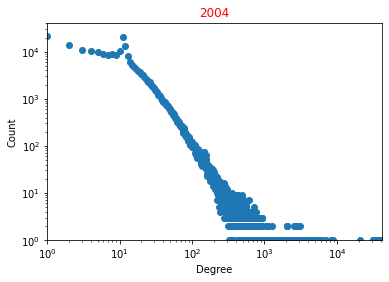

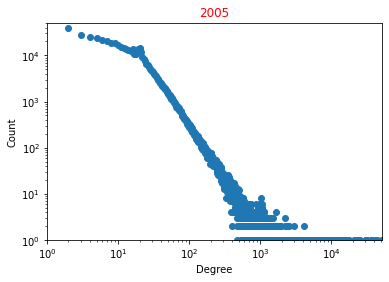

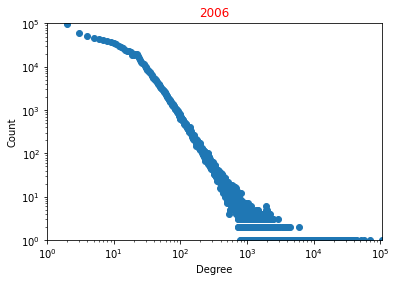

In [ ]:
plot_degree_dist(path_2001, title='2001')
plot_degree_dist(path_2002, title='2002')
plot_degree_dist(path_2003, title='2003')
plot_degree_dist(path_2004, title='2004')
plot_degree_dist(path_2005, title='2005')
plot_degree_dist(path_2006, title='2006')

<font color='yellow' size='5px'>
Fraction of nodes in the largest weakly connected components

In [ ]:
def calculate_ratio_largest_wcc(path):
  g = create_wiki_graph(path)
  largest_wcc = list(max(nx.weakly_connected_components(g), key=len))
  ratio = len(largest_wcc)/len(g.nodes())
  return ratio

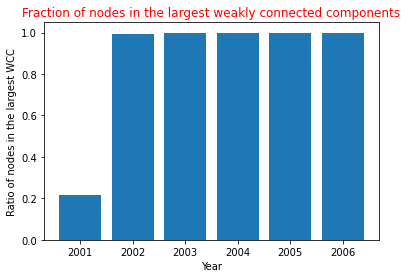

In [ ]:
def plot_ratios_largest_wcc():
  ratios = []
  ratios.append(calculate_ratio_largest_wcc(path_2001))
  ratios.append(calculate_ratio_largest_wcc(path_2002))
  ratios.append(calculate_ratio_largest_wcc(path_2003))
  ratios.append(calculate_ratio_largest_wcc(path_2004))
  ratios.append(calculate_ratio_largest_wcc(path_2005))
  ratios.append(calculate_ratio_largest_wcc(path_2006))

  snapshots = ['2001', '2002', '2003', '2004', '2005', '2006']
  plt.figure(1)
  plt.title('Fraction of nodes in the largest weakly connected components', color='red')
  plt.xlabel('Year')
  plt.ylabel('Ratio of nodes in the largest WCC')
  plt.bar(snapshots, ratios)
  plt.show()

plot_ratios_largest_wcc()

<font color='yellow' size='5px'>
Average Node Degree

In [ ]:
def calculate_average_node_degree(path):
  g = create_wiki_graph(path)
  degrees = [nx.degree(g, n) for n in g.nodes()]
  avg_node_degree = sum(degrees)/len(g.nodes())
  return avg_node_degree

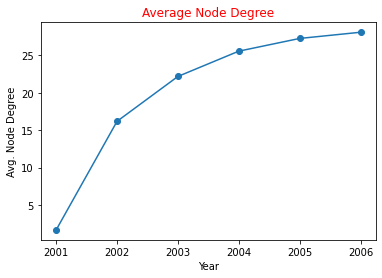

In [ ]:
def plot_average_node_degree():
  list_degrees = []
  list_degrees.append(calculate_average_node_degree(path_2001))
  list_degrees.append(calculate_average_node_degree(path_2002))
  list_degrees.append(calculate_average_node_degree(path_2003))
  list_degrees.append(calculate_average_node_degree(path_2004))
  list_degrees.append(calculate_average_node_degree(path_2005))
  list_degrees.append(calculate_average_node_degree(path_2006))

  snapshots = ['2001', '2002', '2003', '2004', '2005', '2006']

  plt.figure(1)
  plt.title('Average Node Degree', color='red')
  plt.xlabel('Year')
  plt.ylabel('Avg. Node Degree')
  plt.plot(snapshots, list_degrees, marker='o')
  plt.show()

plot_average_node_degree()

<font color='yellow' size='5px'>
Log-log regression nodes vs edges

In [ ]:
nodes = []
edges = []

g = create_wiki_graph(path_2001)
nodes.append(len(g.nodes()))
edges.append(len(g.edges()))

g = create_wiki_graph(path_2002)
nodes.append(len(g.nodes()))
edges.append(len(g.edges()))

g = create_wiki_graph(path_2003)
nodes.append(len(g.nodes()))
edges.append(len(g.edges()))

g = create_wiki_graph(path_2004)
nodes.append(len(g.nodes()))
edges.append(len(g.edges()))

g = create_wiki_graph(path_2005)
nodes.append(len(g.nodes()))
edges.append(len(g.edges()))

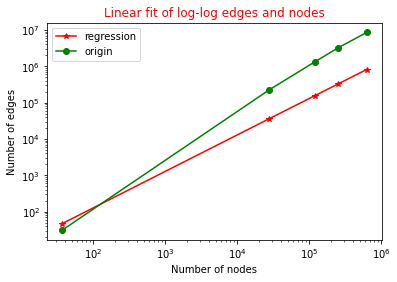

In [ ]:
def plot_loglog_regression_nodes_edges(nodes, edges):
  nodes = np.array(nodes)
  edges = np.array(edges)
  fig = plt.figure()
  ax = plt.gca() 
  fit = np.polyfit(np.log(nodes), np.log(edges), deg=1)
  ax.plot(nodes, fit[0] * nodes + fit[1], color='red', marker='*', label='regression') # add reg line
  ax.plot(nodes, edges, marker='o', color='green', label='origin')
  ax.set_yscale('log')
  ax.set_xscale('log')
  ax.set_title('Linear fit of log-log edges and nodes', color='red')
  ax.set_xlabel('Number of nodes')
  ax.set_ylabel('Number of edges')
  plt.legend()
  plt.show()

plot_loglog_regression_nodes_edges(nodes, edges)

<font color='yellow' size='5px'>
Average Clustering Coefficent

In [ ]:
%%time
avg_ccs = []
avg_ccs.append(nx.average_clustering(create_wiki_graph(path_2001)))

CPU times: user 159 ms, sys: 0 ns, total: 159 ms
Wall time: 164 ms


In [ ]:
%%time
avg_ccs.append(nx.average_clustering(create_wiki_graph(path_2002)))

CPU times: user 7.26 s, sys: 81.9 ms, total: 7.34 s
Wall time: 7.38 s


In [ ]:
%%time
import random
random.seed(1)
g = create_wiki_graph(path_2003)
nodes = random.choices(list(g.nodes()), k=10000)
sub_g = g.subgraph(nodes)
avg_ccs.append(nx.average_clustering(sub_g))

CPU times: user 7.34 s, sys: 373 ms, total: 7.72 s
Wall time: 7.78 s


In [ ]:
%%time
g = create_wiki_graph(path_2004)
nodes = random.choices(list(g.nodes()), k=10000)
sub_g = g.subgraph(nodes)
avg_ccs.append(nx.average_clustering(sub_g))

CPU times: user 48.4 s, sys: 910 ms, total: 49.3 s
Wall time: 49.5 s


In [ ]:
%%time
g = create_wiki_graph(path_2005)
nodes = random.choices(list(g.nodes()), k=10000)
sub_g = g.subgraph(nodes)
avg_ccs.append(nx.average_clustering(sub_g))

CPU times: user 55.3 s, sys: 2.5 s, total: 57.8 s
Wall time: 58.1 s


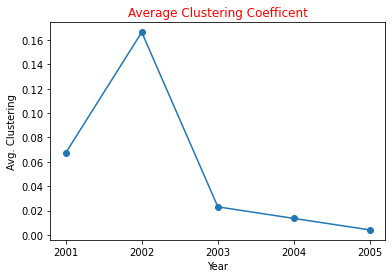

In [ ]:
def plot_average_clustering(snapshots, avg_ccs):
  plt.figure(1)
  plt.title('Average Clustering Coefficent', color='red')
  plt.xlabel('Year')
  plt.ylabel('Avg. Clustering')
  plt.plot(snapshots, avg_ccs, marker='o')
  plt.show()

snapshots = ['2001', '2002', '2003', '2004', '2005']
plot_average_clustering(snapshots, avg_ccs)

<font color='#ffff00' size='5px'>
Effective diameter

In [ ]:
!pip install networkit

     |████████████████████████████████| 3.0MB 5.9MB/s 
  Created wheel for networkit: filename=networkit-8.0-cp36-cp36m-linux_x86_64.whl size=8028858 sha256=865228cf4891bd19f459f68fa43694d9679a3935274b9f738ca50d1e65d467a9
  Stored in directory: /root/.cache/pip/wheels/69/43/a6/9f253843afcae8370e0f50964224c2dd84142d0a57be0440dc
Successfully built networkit


In [ ]:
import networkit as nk
def calculate_effective_diameter(path):
  g = create_wiki_graph(path)
  g_un = g.to_undirected()
  largest_subgraph = g_un.subgraph(list(nx.connected_components(g_un))[0])
  g_nk = nk.nxadapter.nx2nk(largest_subgraph)
  eff_diameter = nk.distance.EffectiveDiameter(g_nk)
  nk.distance.EffectiveDiameter.run(eff_diameter)
  return nk.distance.EffectiveDiameter.getEffectiveDiameter(eff_diameter)

In [ ]:
%%time
effective_diameters = []
effective_diameters.append(calculate_effective_diameter(path_2001))
print('Effective diameter of year 2001:', effective_diameters[-1])

Effective diameter of year 2001: 2.625
CPU times: user 141 ms, sys: 1.39 ms, total: 143 ms
Wall time: 155 ms


In [ ]:
%%time
effective_diameters.append(calculate_effective_diameter(path_2002))
print('Effective diameter of year 2002:', effective_diameters[-1])

Effective diameter of year 2002: 4.857189566228294
CPU times: user 3min 25s, sys: 332 ms, total: 3min 26s
Wall time: 3min 27s


In [ ]:
%%time
effective_diameters.append(calculate_effective_diameter(path_2003))
print('Effective diameter of year 2003:', effective_diameters[-1])

Effective diameter of year 2003: 4.18139366607209
CPU times: user 1h 13min 18s, sys: 9.79 s, total: 1h 13min 28s
Wall time: 1h 13min 57s


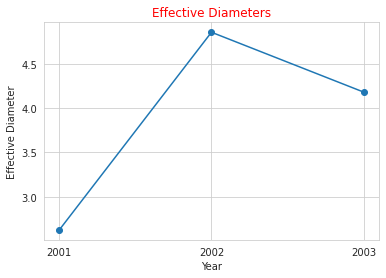

In [ ]:
snapshots = ['2001', '2002', '2003']
def plot_effective_diameters(snapshots, effective_diameters):
  plt.figure(1)
  plt.title('Effective Diameters', color='red')
  plt.xlabel('Year')
  plt.ylabel('Effective Diameter')
  plt.plot(snapshots, effective_diameters, marker='o')
  plt.show()

plot_effective_diameters(snapshots, effective_diameters)